# Preprocessing before building machine learning models

Lino Galiana  
2025-03-19

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/modelisation/0_preprocessing.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«0_preprocessing»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/modelisation%200_preprocessing%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«0_preprocessing»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/modelisation%200_preprocessing%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/modelisation/0_preprocessing.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

# 1. Introduction

The [introduction to this section](../../content/modelisation/index.qmd) discussed the importance of adopting an algorithmic rather than a statistical approach for modeling empirical processes. The goal of this chapter is to introduce machine learning methodology and the choices that an algorithmic approach entails for structuring data work. This will also be an opportunity to introduce the Python machine learning ecosystem, particularly its core library: [`Scikit-Learn`](https://scikit-learn.org/stable/).

The aim of this chapter is to present some data preparation elements. This is a fundamental step that should not be overlooked. Models are based on certain assumptions, usually related to the theoretical distribution of variables, which are integrated into them.

It is necessary to align the empirical distribution with these assumptions, which requires a restructuring of the data. This will lead to more relevant modeling results. In the chapter on *pipelines*, we will see how to industrialize these preprocessing steps to simplify applying a model to a dataset different from the one on which it was estimated.

This chapter, like the entire machine learning section, is a practical introduction illustrated from an electoral prediction perspective. Specifically, it involves predicting the results of the 2020 U.S. elections at the county level based on socio-demographic variables. The underlying idea is that there are sociological, economic, or demographic factors influencing voting behavior, but the motivations or complex interactions between these factors are not well understood.

## 1.1 Introduction to the `Scikit` ecosystem

`Scikit Learn` is currently the go-to library in the machine learning ecosystem. It is a library that, despite its many implemented methods, offers the advantage of a unified entry point. This unified approach is one of the reasons for its early success. `R` only recently gained a unified library, namely [`tidymodels`](https://www.tidymodels.org/).

Another reason for `Scikit`’s success is its operational focus: deploying models developed through `Scikit` pipelines is cost-effective. A [dedicated chapter of this course](../../pipeline-scikit) covers pipelines.
Together with Romain Avouac, we offer a [more advanced course](https://ensae-reproductibilite.github.io/website/) in the final year at ENSAE, where we present some challenges related to deploying models developed with `Scikit`.

The `Scikit` user guide is a valuable reference to consult regularly. The section on *preprocessing*, the focus of this chapter, is available [here](https://scikit-learn.org/stable/modules/preprocessing.html).

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Scikit Learn, a French Success! 🐓🥖🥐</h3>

`Scikit Learn` is an open-source library originating from the work of [Inria](https://www.inria.fr/fr) 🇫🇷. For over 10 years, this French public institution has developed and maintained this package, which is downloaded 2 million times a day. In 2023, to secure the maintenance of this package, a startup named [`Probabl.ai`](https://probabl.ai/) was created around the team of `Scikit` developers.

To explore the depth of the `Scikit` ecosystem, it is recommended to follow the
[`Scikit MOOC`](https://www.fun-mooc.fr/fr/cours/machine-learning-python-scikit-learn/),
developed as part of the [`Inria Academy`](https://www.inria.fr/fr/mooc-scikit-learn) initiative.

</div>

## 1.2 Data preparation

Exercise 1 allows those interested to try to recreate it step by step.

The following packages are needed to import and visualize the election data:

In [1]:
!pip install --upgrade xlrd
!pip install geopandas

The data sources are varied, so the code that builds the final dataset is provided directly.
Building a single dataset can be somewhat tedious, but it’s a good exercise, which you can try,
to [review `Pandas`](../../content/manipulation/02a_pandas_tutorial.qmd):

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 1 (Optional): Build the Database</h3>

**This exercise is OPTIONAL**

1.  Download and import the shapefile [from this link](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_02_sldl_500k.zip)
2.  Exclude the following states: “02”, “69”, “66”, “78”, “60”, “72”, “15”
3.  Import election results from [this link](https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv)
4.  Import the datasets available on the USDA site, ensuring that FIPS code variables are named consistently
    across all 4 datasets
5.  *Merge* these 4 datasets into a single socioeconomic characteristics dataset
6.  *Merge* with the election data using the FIPS code
7.  *Merge* with the shapefile using the FIPS code. Be mindful of leading zeros in some codes. It is
    recommended to use the `str.lstrip` method to remove them
8.  Import election data from 2000 to 2016 from the [MIT Election Lab](https://electionlab.mit.edu/data).
    The data can be directly queried from this URL:
    <https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false>
9.  Create a `share` variable to account for each candidate’s vote share.
    Keep only the columns `"year", "FIPS", "party", "candidatevotes", "share"`
10. Perform a `long` to `wide` conversion using the `pivot_table` method to keep one row
    per county x year with each candidate’s results in columns for that state.
11. Merge with the rest of the dataset using the FIPS code.

</div>

In [2]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/main/content/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
votes = getdata.create_votes_dataframes()

However, before focusing on data preparation, we will spend some time exploring the structure of the data from which we want to build a model. This is essential to understand its nature and choose an appropriate model.

This code introduces a dataset named `votes` into the environment. It is a combined dataset from different sources and appears as follows:

In [3]:
votes.loc[:, votes.columns != "geometry"].head(3)

3 rows × 305 columns

The following choropleth map provides a quick visualization of the results (Alaska and Hawaii are excluded).

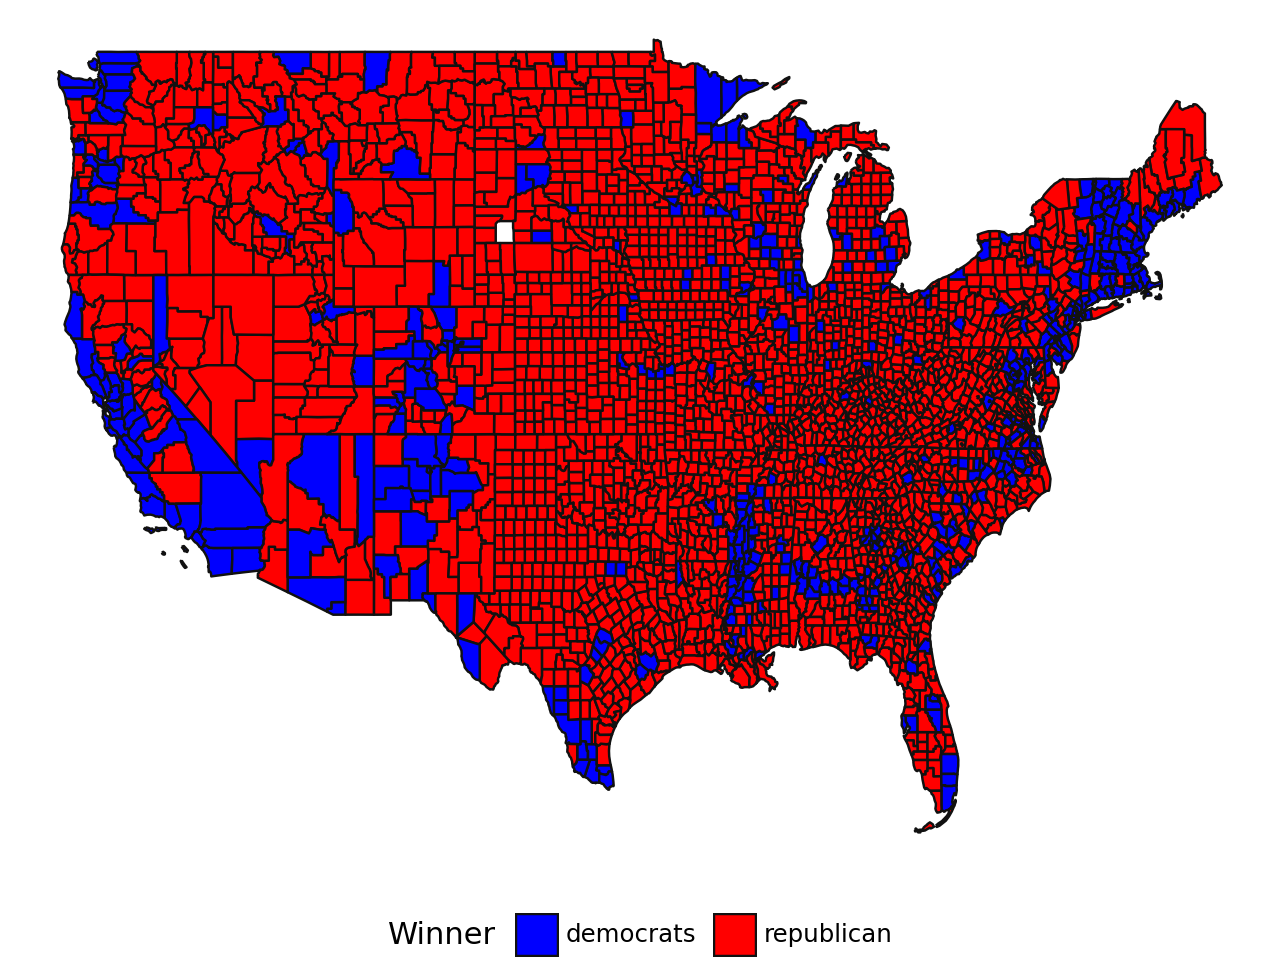

In [4]:
from plotnine import *

# republican : red, democrat : blue
color_dict = {'republican': '#FF0000', 'democrats': '#0000FF'}

(
  ggplot(votes) +
  geom_map(aes(fill = "winner")) +
  scale_fill_manual(color_dict) +
  labs(fill = "Winner") +
  theme_void() +
  theme(legend_position = "bottom")
)

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> The Territorial Trap</h3>

As mentioned in the [chapter on mapping](../../content/visualisation/matplotlib.qmd), choropleth maps can give a misleading impression that the Republican Party won by a large margin in 2020 because this type of graphic representation gives more importance to large areas rather than dense areas. This explains why this type of map has been used as justification for contesting the election results.

There are alternative representations better suited to such phenomena where density is significant. One such representation is proportional circles (see Insee (2018), *“The Territorial Trap in Cartography”*). Proportional circles allow the eye to focus on denser areas rather than large open spaces. With this representation, it becomes clear that the Democratic vote is in the majority, which was obscured by the flat color fill.

The [GIF “Land does not vote, people do”](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF), which gained popularity in 2020, offers another visualization approach. The original map was created with `JavaScript`. However, with `Python`, we have several tools to replicate this map at a low cost using one of the `JavaScript` overlays discussed in the [visualization section](../../content/visualisation/index.qmd).

</div>

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd
import plotly
import plotly.graph_objects as go


centroids = votes.copy()
centroids.geometry = centroids.centroid
centroids['size'] = centroids['CENSUS_2020_POP'] / 10000  # to get reasonable plotable number

color_dict = {"republican": '#FF0000', 'democrats': '#0000FF'}
centroids["winner"] =  np.where(centroids['votes_gop'] > centroids['votes_dem'], 'republican', 'democrats') 


centroids['lon'] = centroids['geometry'].x
centroids['lat'] = centroids['geometry'].y
centroids = pd.DataFrame(centroids[["county_name",'lon','lat','winner', 'CENSUS_2020_POP',"state_name"]])
groups = centroids.groupby('winner')

df = centroids.copy()

df['color'] = df['winner'].replace(color_dict)
df['size'] = df['CENSUS_2020_POP']/6000
df['text'] = df['CENSUS_2020_POP'].astype(int).apply(lambda x: '<br>Population: {:,} people'.format(x))
df['hover'] = df['county_name'].astype(str) +  df['state_name'].apply(lambda x: ' ({}) '.format(x)) + df['text']

fig_plotly = go.Figure(
  data=go.Scattergeo(
  locationmode = 'USA-states',
  lon=df["lon"], lat=df["lat"],
  text = df["hover"],
  mode = 'markers',
  marker_color = df["color"],
  marker_size = df['size'],
  hoverinfo="text"
  )
)

fig_plotly.update_traces(
  marker = {'opacity': 0.5, 'line_color': 'rgb(40,40,40)', 'line_width': 0.5, 'sizemode': 'area'}
)

fig_plotly.update_layout(
  title_text = "Reproduction of the \"Acres don't vote, people do\" map <br>(Click legend to toggle traces)",
  showlegend = True,
  geo = {"scope": 'usa', "landcolor": 'rgb(217, 217, 217)'}
)

fig_plotly.show()

# 2. General Approach

In this chapter, we will focus on data preparation to be done before modeling work. This step is essential to ensure consistency between the data and modeling assumptions and to produce scientifically valid analyses.

The general approach we will adopt in this chapter, which will be refined in subsequent chapters, is as follows:

<figure id="fig-ml-pipeline">
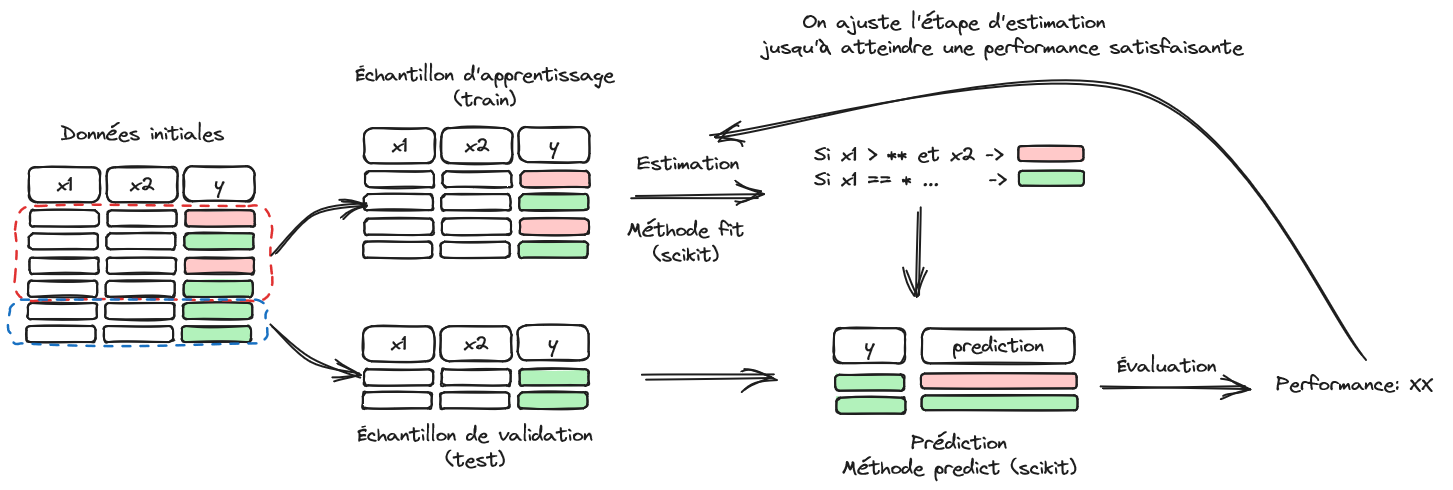
<figcaption>Figure 2.1: Illustration of machine learning methodology</figcaption>
</figure>

<a href="#fig-ml-pipeline" class="quarto-xref">Figure 2.1</a> illustrates the structure of a machine learning problem.

First, the available dataset is split into two parts: **training sample** and **validation sample**. The former is used to train a model, and its prediction quality is evaluated on the latter to limit overfitting bias. The next chapter will delve deeper into model evaluation. At this stage of our progress, we will focus in this chapter on data issues.

The `Scikit` library is particularly convenient because it offers many machine learning algorithms with a few unified entry points, especially the `fit` and `predict` methods. However, the unification extends beyond algorithm training. All data preparation steps integrated into `Scikit` offer these same entry points. In other words, data preparations are built like parameter estimations that can be reapplied to another dataset. For example, this data preparation might be a mean and variance estimation for normalizing variables. The mean and variance are calculated on the training sample, and the same values can be reapplied to another dataset to normalize it in the same way.

# 3. Exploring data structure

The first necessary step before diving into modeling is to determine which variables to include in the model.

`Pandas` functionalities are sufficient at this stage for exploring simple structures.
However, when dealing with a dataset with numerous explanatory variables (*features* in machine learning, *covariates* in econometrics), it is often wise to start with a variable selection step, which we will cover later in the [dedicated section](../../content/modelisation/4_featureselection.qmd).

Before selecting the best set of explanatory variables, we will start with a small and arbitrary selection.
The first task is to represent the relationships within the data, particularly the relationship between explanatory variables and the dependent variable (the Republican Party’s score), as well as relationships among explanatory variables.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 2 (Optional): Examining Correlations Between Variables</h3>

**This exercise is OPTIONAL**

1.  Create a smaller DataFrame `df2` with the variables `winner`, `votes_gop`, `Unemployment_rate_2019`,
    `Median_Household_Income_2019`,
    `Percent of adults with less than a high school diploma, 2015-19`,
    `Percent of adults with a bachelor's degree or higher, 2015-19`.
2.  Use a graph to represent the correlation matrix. You can use the `seaborn` package and its `heatmap` function.

</div>

In [6]:
# 1. Créer le data.frame df2.
df2 = votes.set_index("GEOID").loc[
    : ,
    [
        "winner", "votes_gop",
        'Unemployment_rate_2019', 'Median_Household_Income_2021',
        'Percent of adults with less than a high school diploma, 2018-22',
        "Percent of adults with a bachelor's degree or higher, 2018-22"
    ]
]
df2 = df2.dropna()

Matrix created with `seaborn` (question 2) will look as follows:

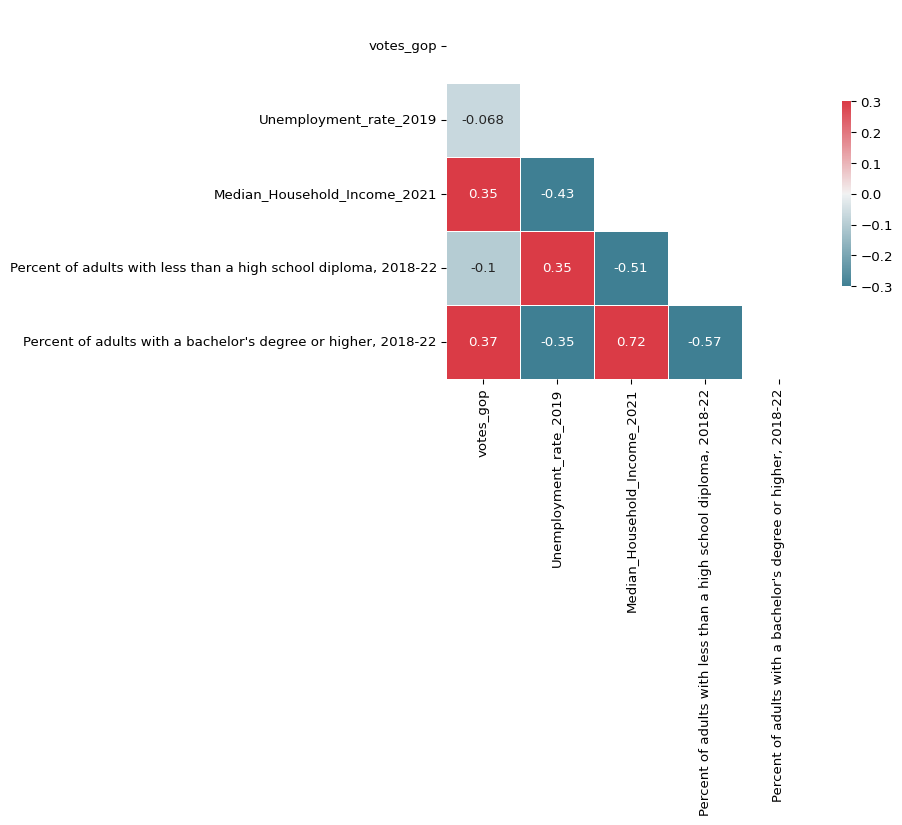

The scatter plot obtained after question 3 will look like:

array([[<Axes: xlabel='votes_gop', ylabel='votes_gop'>,
        <Axes: xlabel='Unemployment_rate_2019', ylabel='votes_gop'>,
        <Axes: xlabel='Median_Household_Income_2021', ylabel='votes_gop'>,
        <Axes: xlabel='Percent of adults with less than a high school diploma, 2018-22', ylabel='votes_gop'>,
        <Axes: xlabel="Percent of adults with a bachelor's degree or higher, 2018-22", ylabel='votes_gop'>],
       [<Axes: xlabel='votes_gop', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Unemployment_rate_2019', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Median_Household_Income_2021', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Percent of adults with less than a high school diploma, 2018-22', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel="Percent of adults with a bachelor's degree or higher, 2018-22", ylabel='Unemployment_rate_2019'>],
       [<Axes: xlabel='votes_gop', ylabel='Median_Household_Income_2021'>,
        <Axes: xlabel=

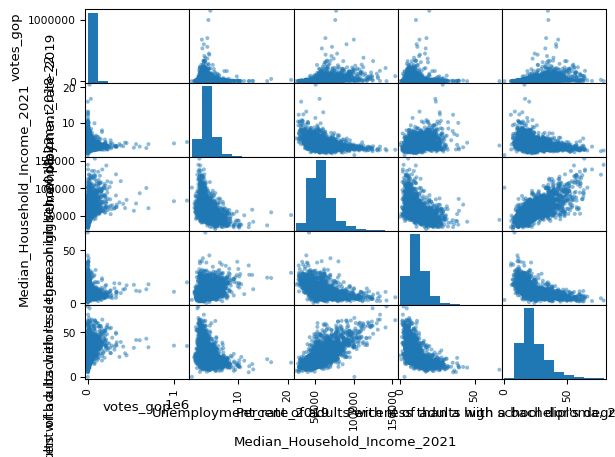

In [8]:
# 3. Matrice de nuages de points
pd.plotting.scatter_matrix(df2)

The result of question 4, on the other hand, should look like the following chart:

# 4. Transforming Data

Differences in scale or distribution between variables can diverge from the underlying assumptions in models.

For example, in linear regression, categorical variables are not treated the same way as variables with values in $\mathbb{R}$. A discrete variable (taking a finite number of values) must be transformed into a sequence of 0/1 variables (dummies) relative to a reference category to meet the assumptions of linear regression. This type of transformation is known as *one-hot encoding*, which we will revisit. It is one of many transformations available in `Scikit` to align a dataset with mathematical assumptions.

All these data preparation tasks fall under preprocessing or feature engineering. One advantage of using `Scikit` is that preprocessing tasks can be considered learning tasks. Preprocessing involves learning parameters from a data structure (e.g., estimating means and variances to subtract from each observation), and these parameters can then be applied to observations not used to calculate them. In other words, this data preparation fits seamlessly into the pipeline shown in <a href="#fig-ml-pipeline" class="quarto-xref">Figure 2.1</a>.

## 4.1 Continuous Variable Preprocessing

We will cover two very common preprocessing steps for continuous variables:

1.  **Standardization** transforms data so that the empirical distribution follows a $\mathcal{N}(0,1)$ distribution.

2.  **Normalization** transforms data to achieve a unit norm ($\mathcal{l}_1$ or $\mathcal{l}_2$). In other words, with the appropriate norm, the sum of elements equals 1.

There are other options, such as `MinMaxScaler` to rescale variables according to observed minimum and maximum bounds. The choice of method depends on the algorithms chosen later: the assumptions of k-nearest neighbors (knn) differ from those of a random forest. For this reason, complete pipelines are usually defined, integrating both preprocessing and learning, which will be discussed in upcoming chapters.

<div class="alert alert-" role="alert">
<h3 class="alert-heading"> Caution</h3>

For statisticians,
the term *normalization* in `Scikit` terminology can have a counterintuitive meaning.
One might expect normalization to transform a variable so that $X \sim \mathcal{N}(0,1)$.
In `Scikit`, this is actually **standardization**.

</div>

### 4.1.1 Standardization

Standardization involves transforming data so that the empirical distribution follows a $\mathcal{N}(0,1)$ distribution. For optimal performance, most machine learning models often require data to follow this distribution. Even when it’s not essential, as with logistic regressions, it can speed up the convergence rate of algorithms.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 3: Standardization</h3>

1.  Standardize the `Median_Household_Income_2021` variable (do not overwrite the values!) and examine the histogram before and after normalization. This transformation should be applied to the entire column; the next questions will address sample splitting and extrapolation.

*Note: This should yield a distribution centered at zero, and we could verify that the empirical variance is indeed 1. We could also check that this is true when transforming multiple columns at once.*

1.  Create `scaler`, a `Transformer` built on the first 1000 rows of your `df2` DataFrame, excluding the target variable `winner`. Check the mean and standard deviation of each column for these same observations.

*Note: The parameters used for subsequent standardization are stored in the `.mean_` and `.scale_` attributes.*

These attributes can be seen as parameters trained on a specific dataset that can be reused on another, as long as the dimensions match.

1.  Apply `scaler` to the remaining rows of the DataFrame and compare the distributions obtained for the `Median_Household_Income_2021` variable.

*Note: Once applied to another `DataFrame`, you may notice that the distribution is not exactly standardized in the DataFrame on which the parameters were not estimated. This is normal; the initial sample was not random, so the means and variances of this sample do not necessarily match those of the complete sample.*

</div>

Before standardization, our variable has this distribution:

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 57'. Pick better value with 'binwidth'.

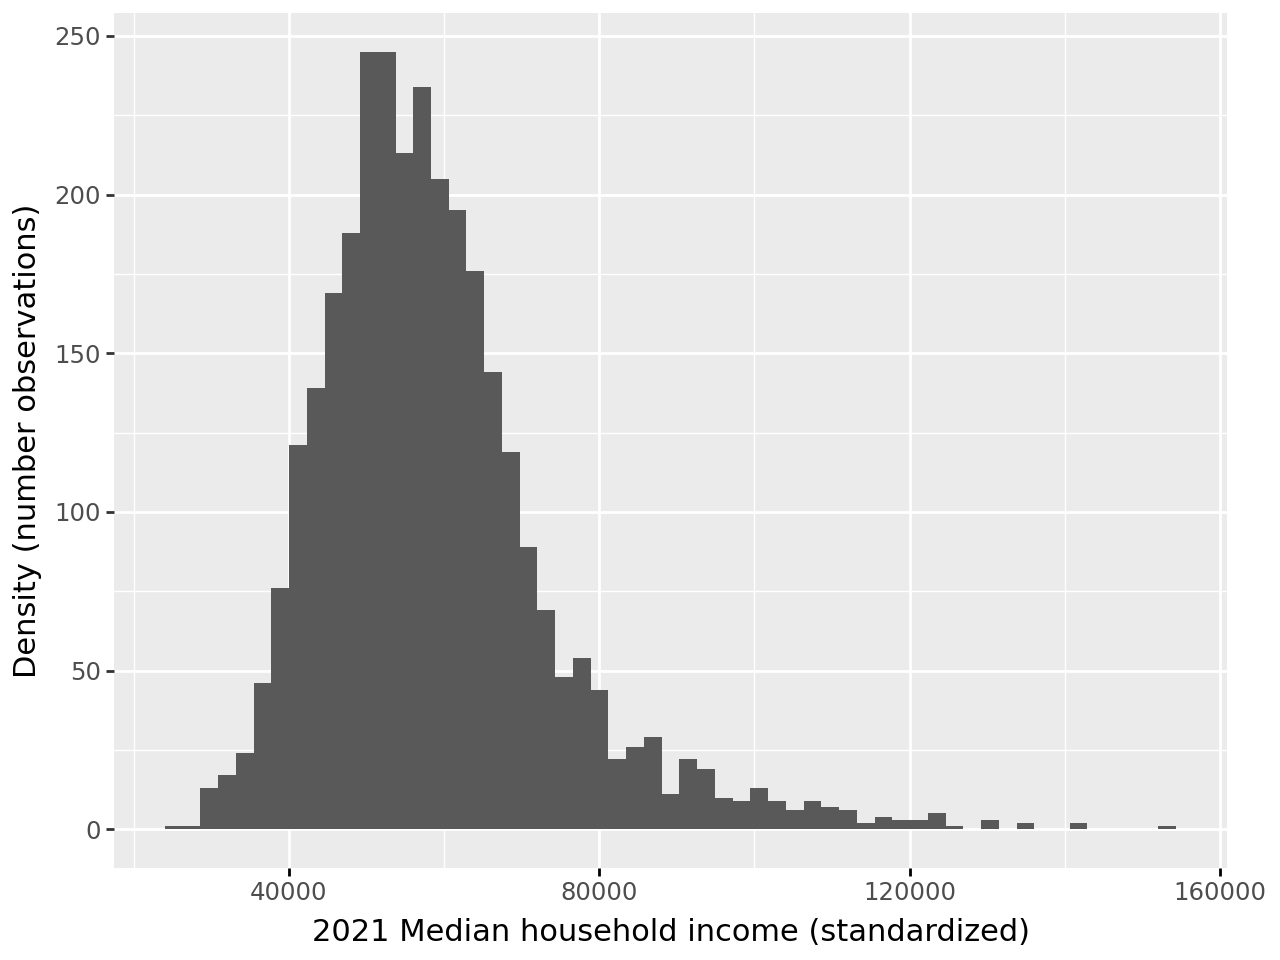

After standardization, the scale of the variable has changed.

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 57'. Pick better value with 'binwidth'.

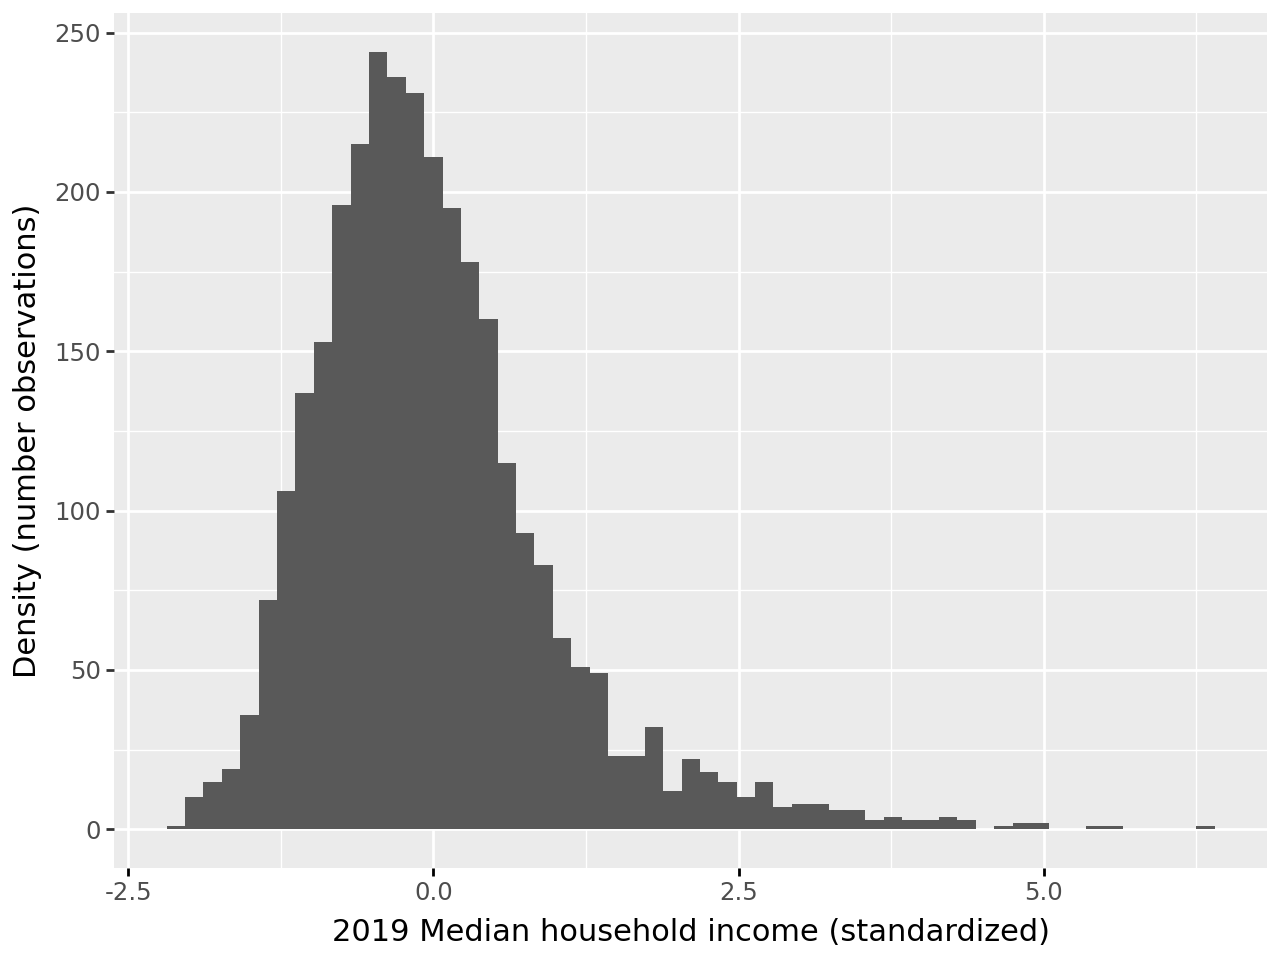

We indeed obtain a mean equal to 0 and a variance equal to 1, within numerical approximations:

For question 2, if we attempt to present the obtained statistics in a readable table, we get

It is very clear from this table that the standardization worked well.

Now, if we create a formal transformer for our variables (question 3)

StandardScaler() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. StandardScaler ? Documentation for StandardScaler i Fitted StandardScaler()

We can extrapolate our standardizer to a larger dataset. If we look at the distribution obtained on the first 1000 rows (question 3), we find a scale consistent with a $\mathcal{N(0,1)}$ distribution for the unemployment variable:

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 80'. Pick better value with 'binwidth'.

However, we see that this distribution does not correspond to the one that would truly normalize the rest of the data.

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 38'. Pick better value with 'binwidth'.

This is an illustration of a classic problem in machine learning, called *data drift*, which occurs when we attempt to extrapolate to data whose distribution no longer corresponds to that of the training data. This situation typically arises when an algorithm has been trained on a biased sample of the population or when we have non-stationary time series data. It is, therefore, essential to carefully consider the construction of the training sample and the potential for extrapolation to a broader population: the external validity of the model—whether data preparation or learning algorithm—can be null if this step was rushed.

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Data Drift</h3>

Data drift refers to a shift in data distribution over time, leading to a degradation in the performance of a machine learning model that, by design, was trained on past data.

This phenomenon can occur due to changes in the target population, shifts in data characteristics, or external factors.

Detecting data drift is crucial to adjust or retrain the model, ensuring its relevance and accuracy. Detection techniques include statistical tests and monitoring specific metrics.

</div>

### 4.1.2 Normalization

**Normalization** is the process of transforming data to achieve a unit norm ($\mathcal{l}_1$ or $\mathcal{l}_2$).
In other words, with the appropriate norm, the sum of elements equals 1.
By default, `Scikit` uses an $\mathcal{l}_2$ norm.
This transformation is especially useful in text classification or clustering.

This is also an opportunity to explore how to split data into multiple samples using the [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html) function in `Scikit`. We will create a 70% sample of the data to estimate normalization parameters (training phase) and extrapolate to the remaining 30%. This split is fairly standard but, of course, adaptable depending on the project. The advantage of using [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html) instead of manually sampling with `Pandas`’ `sample` method is that `Scikit`’s function allows for much more control over sampling, particularly if stratification is desired, while being reliable. Doing this manually can be tedious and risky, as it is potentially complex to implement without errors.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 4: Normalization</h3>

1.  Using the documentation for the [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html) function in `Scikit`, create two samples (70% and 30% of the data, respectively).
2.  Normalize the `Median_Household_Income_2021` variable (do not overwrite the values!) and examine the histogram before and after normalization.
3.  Verify that the $\mathcal{l}_2$ norm is indeed equal to 1 (using the `np.linalg.norm` function with the `axis=1` argument) for the first 10 observations in the training set and then for the other observations.

</div>

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 51'. Pick better value with 'binwidth'.

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 115'. Pick better value with 'binwidth'.

/opt/conda/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 87'. Pick better value with 'binwidth'.

Finally, if we compute the norm, we obtain the expected result on both the train sample and the extrapolated sample.

## 4.2 Encoding Categorical Values

Categorical data must be recoded into numeric values to be integrated into machine learning models.

This can be done in several ways with `Scikit`:

-   `LabelEncoder`: transforms a vector `["a","b","c"]` into a numeric vector `[0,1,2]`. This approach has the drawback of introducing an order to the categories, which is not always desirable.
-   `OrdinalEncoder`: a generalized version of `LabelEncoder` designed to apply to matrices ($X$), while `LabelEncoder` applies mainly to a vector ($y$).

For one-hot encoding, several methods are available:

-   `pandas.get_dummies` performs a dummy expansion.
    A vector of size *n* with *K* categories will be transformed into a matrix of size $n \times K$, where each column represents a dummy variable for category *k*.
    There are $K$ categories, resulting in multicollinearity.
    In linear regression with a constant,
    one category should be removed before estimation.

-   `OneHotEncoder` is a generalized (and optimized) version of dummy expansion. This is the recommended method.

## 4.3 Imputation

Data often contains missing values, that is, observations in our *DataFrame* containing a `NaN`. These gaps can cause bugs or misinterpretations when moving to modeling.
One initial approach could be to remove all observations with a `NaN` in at least one column.
However, if our table contains many `NaN`s, or if these are spread across numerous columns,
we risk removing a significant number of rows, and, with that, losing important information, as missing values are rarely [randomly distributed](https://stefvanbuuren.name/fimd/sec-MCAR.html).

While this solution remains viable in many cases, a more robust approach called *imputation* exists. This method involves replacing missing values with a specified value. For example:

-   Mean imputation: replacing all `NaN`s in a column with the column’s average;
-   Median imputation on the same principle, or using the most frequent column value for categorical variables;
-   Regression imputation: using other variables to interpolate an appropriate replacement value.

More complex methods are available, but in many cases, the above approaches can provide much more satisfactory results.
The `Scikit` package makes imputation very straightforward ([documentation here](https://scikit-learn.org/stable/modules/impute.html)).

## 4.4 Handling Outliers

Outliers are observations that significantly deviate from the general trend of other observations in a dataset. In other words, they are data points that stand out unusually from the overall data distribution.
This may be due to data entry errors, respondents who incorrectly answered a survey, or simply extreme values that may bias a model too much.

For example, these could be 3 individuals measuring over 4 meters in height within a population or household incomes exceeding 10 million euros per month at a national level.

It is good practice to routinely examine the distribution of available variables
to check if some values deviate too significantly from others.
Sometimes these values will interest us, for instance, if we are focusing solely on very high incomes (top 0.1%) in France. However, often these values will be more of a hindrance, especially if they don’t make sense in the real world.

If we find that the presence of these extreme values or *outliers* in our dataset is more problematic than helpful,
it is reasonable to simply remove them.
Most of the time, we set a percentage of data to remove, such as 0.1%, 1%, or 5%,
then remove the corresponding extreme values in both tails of the distribution.

Several packages can perform these operations, which can become complex if we examine outliers across multiple variables.
The `IsolationForest()` function in the `sklearn.ensemble` package is particularly noteworthy.

## 4.5 Application exercise

<div class="alert alert-" role="alert">
<h3 class="alert-heading"> Be careful with new categories!</h3>

Transformers create a mapping between text categories and numeric values. This assumes that the data used to build this mapping includes all possible values for the text categories.

However, if new categories appear, the classifier will not know how to transform these into numeric values, which will cause an error in `Scikit`. This technical error makes sense, as it would require updating not only the mapping but also the estimation of underlying parameters.

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercise 5: Encoding Categorical Variables</h3>

1.  Create `df` that retains only the `state_name` and `county_name` variables in `votes`.

2.  Apply a `LabelEncoder` to `state_name`
    *Note: The label encoding result is relatively intuitive, especially when related to the initial vector.*

3.  Observe the dummy expansion of `state_name`

4.  Apply an `OrdinalEncoder` to `df[['state_name', 'county_name']]`
    *Note: The ordinal encoding result is consistent with the label encoding*

5.  Apply a `OneHotEncoder` to `df[['state_name', 'county_name']]`

*Note: `scikit` optimizes the object required to store the result of a transformation model. For example, the One Hot encoding result is a very large object. In this case, `scikit` uses a Sparse matrix.*

</div>

If we examine the labels and their numeric transpositions via `LabelEncoder`

array([[23, 'Missouri'],
       [25, 'Nebraska'],
       [30, 'New York'],
       ...,
       [41, 'Texas'],
       [41, 'Texas'],
       [41, 'Texas']], shape=(3107, 2), dtype=object)

3107 rows × 49 columns

If we examine the `OrdinalEncoder`:

array([23., 25., 30., ..., 41., 41., 41.], shape=(3107,))

<3107x1891 sparse matrix of type '<class 'numpy.float64'>'
    with 6214 stored elements in Compressed Sparse Row format>

# Reference

Insee. 2018. “Guide de Sémiologie Cartographique.”